In [1]:
import pandas as pd
import streamlit as st
from datetime import timedelta
from multicall import Call
import plotly.express as px
import numpy as np


from mainnet_launch.data_fetching.get_state_by_block import (
    get_raw_state_by_blocks,
    get_state_by_one_block,
    identity_with_bool_success,
    safe_normalize_with_bool_success,
    add_timestamp_to_df_with_block_column,
    build_blocks_to_use,
    eth_client,
)

from mainnet_launch.data_fetching.get_events import fetch_events

from mainnet_launch.constants import AUTO_ETH, AUTO_LRT, BAL_ETH, eth_client
from mainnet_launch.abis.abis import AUTOPOOL_VAULT_ABI
import plotly.io as pio

pio.templates.default = None

autoETH_vault = eth_client.eth.contract(BAL_ETH.autopool_eth_addr, abi=AUTOPOOL_VAULT_ABI)
nav_df = add_timestamp_to_df_with_block_column(fetch_events(autoETH_vault.events.Nav))
FeeCollected_df = add_timestamp_to_df_with_block_column(fetch_events(autoETH_vault.events.FeeCollected))
PeriodicFeeCollected_df = add_timestamp_to_df_with_block_column(fetch_events(autoETH_vault.events.PeriodicFeeCollected))
PeriodicFeeCollected_df.head()

2024-10-18 13:37:14.830 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


,fees,feeSink,mintedShares,event,block,transaction_index,log_index,hash
timestamp,,,,,,,,
2024-09-17 20:37:23,150333352620830316,0x4C0169B48c5A22503F1C3B871b921d55024A5939,150420903136200442,PeriodicFeeCollected,20772755,171,525,0x40ad773427a284900548755da8bd31a8e18ce3610907...
2024-09-18 20:37:35,42265974200693299,0x4C0169B48c5A22503F1C3B871b921d55024A5939,42295918556294341,PeriodicFeeCollected,20779913,454,428,0xe8b4722e4176a54914b474c3b04bdc7112f04a3f9775...
2024-09-19 20:37:35,44090328740050922,0x4C0169B48c5A22503F1C3B871b921d55024A5939,44127180779676250,PeriodicFeeCollected,20787076,157,485,0x2121740f14974545ea691978cea9a732f8d9b3dbb3a8...
2024-09-20 20:37:23,56463594841304094,0x4C0169B48c5A22503F1C3B871b921d55024A5939,56512777275094385,PeriodicFeeCollected,20794231,140,419,0xf0e9744147844e14016f1a32d1240c360996e2879314...
2024-09-21 12:08:23,35582954344898728,0x4C0169B48c5A22503F1C3B871b921d55024A5939,35612919506573628,PeriodicFeeCollected,20798851,157,442,0x7d98f78cf4ceeb6db0064b2252f93d86806515db7087...


In [2]:
FeeCollected_df

,fees,feeSink,mintedShares,profit,totalAssets,event,block,transaction_index,log_index,hash
timestamp,,,,,,,,,,
2024-09-20 00:32:59,38943329689929936,0x4C0169B48c5A22503F1C3B871b921d55024A5939,38974450444517812,1947166484496496780268,1945650632579182119240,FeeCollected,20788248,1,69,0x5904ef2a8ad16218e517be38a07ae26c1d5130d920f6...
2024-09-21 12:08:23,47294713820150900,0x4C0169B48c5A22503F1C3B871b921d55024A5939,47335489210279178,2364735691007544969802,2362745972436834473517,FeeCollected,20798851,157,447,0x7d98f78cf4ceeb6db0064b2252f93d86806515db7087...
2024-09-22 12:52:47,96936502860924350,0x4C0169B48c5A22503F1C3B871b921d55024A5939,97010512727267087,4846825143046217479840,2421660672930994220556,FeeCollected,20806238,138,457,0x94c17fdba93adc9f0735ac48b49e096ce6765d2ccb0a...
2024-09-22 23:18:35,49045178307976054,0x4C0169B48c5A22503F1C3B871b921d55024A5939,49088656005677086,2452258915398802686053,2450136001096369545608,FeeCollected,20809355,45,654,0xf2df8cb8a8f00d401236593822e693bedb95761e7117...
2024-09-23 12:52:35,45404233817209681,0x4C0169B48c5A22503F1C3B871b921d55024A5939,45439460849326135,2270211690860484000195,2268497108979803133635,FeeCollected,20813402,137,446,0x6a7a3bf0f9d5619a9adedd5c2629482d49ebf613c14e...
2024-09-24 12:52:35,112052958823380631,0x4C0169B48c5A22503F1C3B871b921d55024A5939,112131699093657785,5602647941169031527944,2799468899096277486897,FeeCollected,20820577,166,567,0x83f4aa1972ab5c96b1abd5dd033bc0644bdb8946405c...
2024-09-26 22:31:35,734467881345499834,0x4C0169B48c5A22503F1C3B871b921d55024A5939,734486540037258400,36723394067274991697698,3339140027552897699584,FeeCollected,20837792,25,174,0x834cf82ff790c57b80fd15161a00771dc9e506932104...
2024-09-27 20:47:35,908350567954533241,0x4C0169B48c5A22503F1C3B871b921d55024A5939,907698949548272822,45417528397726662038992,3497072404968896755418,FeeCollected,20844448,2,77,0x060e2f5e148649fcedbfeed0b60e4ce70085f815ca7d...
2024-09-29 01:28:11,145816453068848291,0x4C0169B48c5A22503F1C3B871b921d55024A5939,145707537117318937,7290822653442414524736,3648282077321272487704,FeeCollected,20853012,4,86,0xa428a6c02ec3069678c5bacebc28a3efb4ebc90d9683...


In [3]:
FeeCollected_df["Cumulative_Streaming_ETH_fees"] = FeeCollected_df["fees"].apply(lambda x: int(x) / 1e18).cumsum()
FeeCollected_df["Cumulative_Streaming_shares_minted"] = (
    FeeCollected_df["mintedShares"].apply(lambda x: int(x) / 1e18).cumsum()
)

PeriodicFeeCollected_df["Cumulative_Periodic_ETH_fees"] = (
    PeriodicFeeCollected_df["fees"].apply(lambda x: int(x) / 1e18).cumsum()
)
PeriodicFeeCollected_df["Cumulative_Periodic_shares_minted"] = (
    PeriodicFeeCollected_df["mintedShares"].apply(lambda x: int(x) / 1e18).cumsum()
)

nav_df["nav"] = nav_df.apply(lambda row: (int(row["idle"]) + int(row["debt"])) / 1e18, axis=1)
nav_df["totalShares"] = nav_df["totalSupply"].apply(lambda x: int(x) / 1e18)
dfs = [
    nav_df[["nav", "totalShares"]],
    PeriodicFeeCollected_df[["Cumulative_Periodic_ETH_fees", "Cumulative_Periodic_shares_minted"]],
    FeeCollected_df[["Cumulative_Streaming_ETH_fees", "Cumulative_Streaming_shares_minted"]],
]
df = pd.concat(dfs).sort_index().ffill().fillna(0)

In [4]:
df["actual_nav_per_share"] = df["nav"] / df["totalShares"]
df["nav_per_share_if_no_streaming_fees"] = df["nav"] / (df["totalShares"] - df["Cumulative_Streaming_shares_minted"])
df["nav_per_share_if_no_periodic_fees"] = df["nav"] / (df["totalShares"] - df["Cumulative_Periodic_shares_minted"])
df["nav_per_share_if_no_fees"] = df["nav"] / (
    df["totalShares"] - df["Cumulative_Streaming_shares_minted"] - df["Cumulative_Periodic_shares_minted"]
)

df["shares_if_no_extra_shares_are_minted"] = (
    df["totalShares"] - df["Cumulative_Streaming_shares_minted"] - df["Cumulative_Periodic_shares_minted"]
)
# fees mint extra shares to tokemak, so calc nav per share if no fees
px.line(
    df[
        [
            "actual_nav_per_share",
            "nav_per_share_if_no_streaming_fees",
            "nav_per_share_if_no_periodic_fees",
            "nav_per_share_if_no_fees",
        ]
    ]
)

In [5]:
# "nav_per_share_if_no_periodic_fees",
# "nav_per_share_if_no_fees",

In [6]:
df["nav_per_share_expected_growth"] = (
    (df["nav_per_share_if_no_streaming_fees"] - 1) * 0.8
) + 1  # if  it was 80% of was wihtout the fees
px.line(df[["actual_nav_per_share", "nav_per_share_if_no_streaming_fees", "nav_per_share_expected_growth"]])

In [7]:
simple_case = [1, 1, 2, 2]
# we take 20% of the growth in nav pershare

In [8]:
periodic_shares_minted_if_high_water_mark = []

high_water_mark = 1

for nav_per_share_if_no_periodic_fees in df["nav_per_share_if_no_periodic_fees"].values:

    if nav_per_share_if_no_periodic_fees <= high_water_mark:
        periodic_shares_minted_if_high_water_mark.append(0)

    else:
        marginal_increase = nav_per_share_if_no_periodic_fees - high_water_mark
        twenty_percent_of_increase = marginal_increase * 0.2

        # if a share is worth
        high_water_mark = nav_per_share_if_no_periodic_fees

In [9]:
df["nav_per_share_if_no_periodic_fees"]

timestamp
2024-09-10 21:30:59    1.000000
2024-09-16 18:10:35    1.000000
2024-09-16 18:13:35    1.000000
2024-09-16 18:18:59    1.000000
2024-09-16 18:19:47    1.000000
                         ...   
2024-10-18 14:32:23    1.003148
2024-10-18 14:33:35    1.003159
2024-10-18 14:33:35    1.003159
2024-10-18 14:33:35    1.003159
2024-10-18 17:55:11    1.003183
Name: nav_per_share_if_no_periodic_fees, Length: 493, dtype: float64

In [15]:
daily_df = df.resample("1D").last().ffill()

for col in [
    "actual_nav_per_share",
    "nav_per_share_if_no_streaming_fees",
    "nav_per_share_if_no_periodic_fees",
    "nav_per_share_if_no_fees",
]:
    value_7_days_ago = daily_df[col].shift(7)
    growth = daily_df[col] - value_7_days_ago
    daily_df[f"7_day_annualized_return {col}"] = growth * (365 / 7) * 100

px.line(
    daily_df[
        [
            "7_day_annualized_return actual_nav_per_share",
            "7_day_annualized_return nav_per_share_if_no_streaming_fees",
            "7_day_annualized_return nav_per_share_if_no_periodic_fees",
            "7_day_annualized_return nav_per_share_if_no_fees",
        ]
    ]
)

expected annualized return 

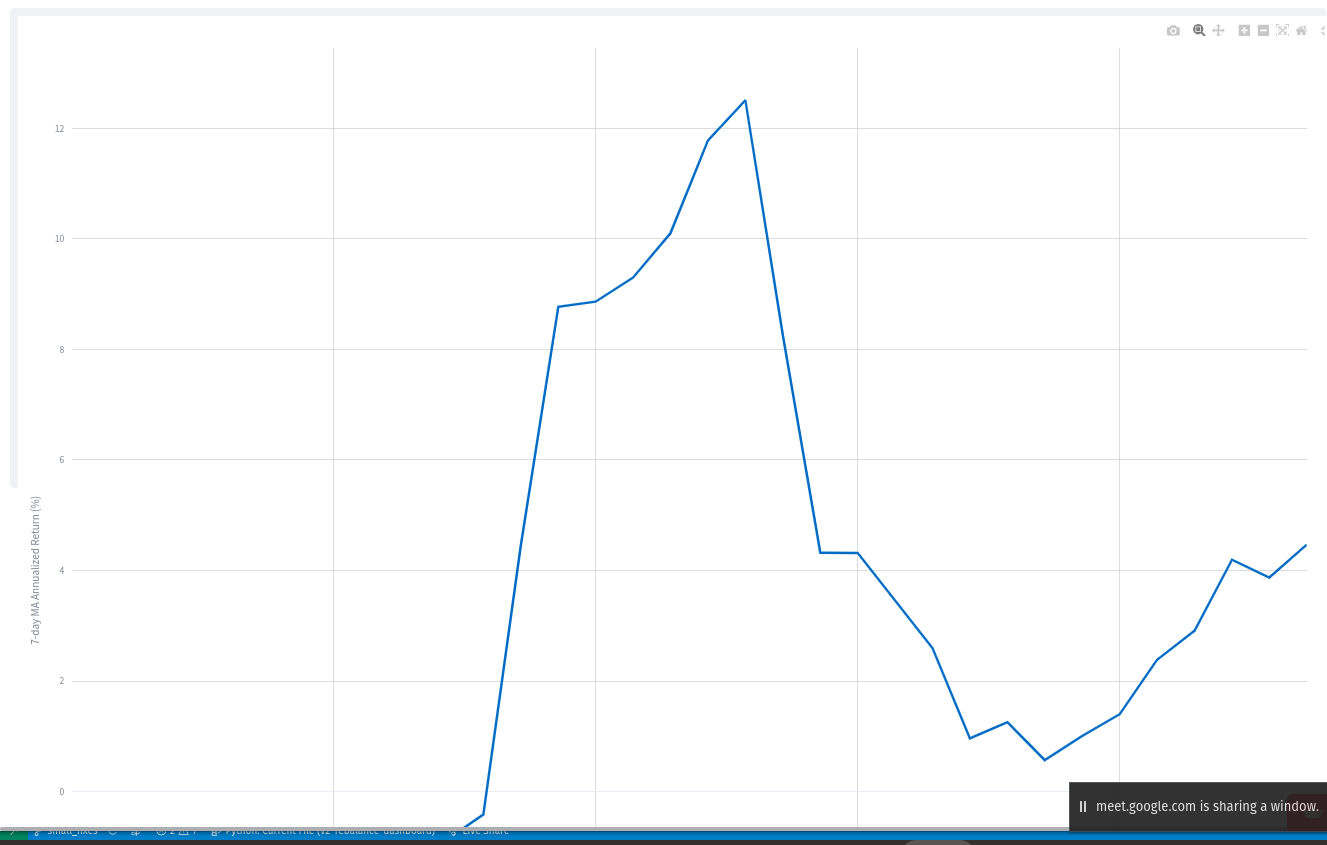

In [11]:
# overlay the expexted reutnr plot

In [12]:
daily_df = df.resample("1D").last().ffill()

for col in [
    "actual_nav_per_share",
    "nav_per_share_if_no_streaming_fees",
    "nav_per_share_if_no_periodic_fees",
    "nav_per_share_if_no_fees",
]:
    value_7_days_ago = daily_df[col].shift(30)
    growth = daily_df[col] - value_7_days_ago
    daily_df[f"30_day_annualized_return {col}"] = growth * (365 / 30) * 100

px.line(
    daily_df[
        [
            "30_day_annualized_return actual_nav_per_share",
            "30_day_annualized_return nav_per_share_if_no_streaming_fees",
            "30_day_annualized_return nav_per_share_if_no_periodic_fees",
            "30_day_annualized_return nav_per_share_if_no_fees",
        ]
    ]
)

In [13]:
daily_df["totalShares_if_no_streaming_fee"] = daily_df["totalShares"] - daily_df["Cumulative_Streaming_shares_minted"]

# this is nice to have, add later.
extra_shares_minted = 0
high_water_mark = 1
for nav, totalShares in zip(daily_df["nav"], daily_df["totalShares_if_no_streaming_fee"]):
    current_total_shares = totalShares + extra_shares_minted
    current_nav_per_share = nav / current_total_shares
    if current_nav_per_share <= high_water_mark:
        # if the current nav per share less than what it was yesterday, don't do anything
        continue
    else:

        extra_shares_to_mint = (0.8 * (nav / (current_nav_per_share - high_water_mark))) - current_total_shares
        extra_shares_minted += extra_shares_to_mint

        current_total_shares = totalShares + extra_shares_minted
        current_nav_per_share = nav / current_total_shares
        high_water_mark = current_nav_per_share

In [14]:
nav_list = [100, 100, 110]
shares_list = [100, 100, 100]

extra_shares_minted = 0
high_water_mark = 1
for nav, totalShares in zip(nav_list, shares_list):
    current_total_shares = totalShares + extra_shares_minted
    current_nav_per_share = nav / current_total_shares
    if current_nav_per_share > high_water_mark:

        expected_nav_per_share_growth = (current_nav_per_share - high_water_mark) * 0.8
        # extra_shares_to_mint = (.8 * (nav / (current_nav_per_share - high_water_mark))) - current_total_shares
        # extra_shares_minted += extra_shares_to_mint

        # current_total_shares = (totalShares + extra_shares_minted)
        # current_nav_per_share = nav / current_total_shares
        # high_water_mark = current_nav_per_share